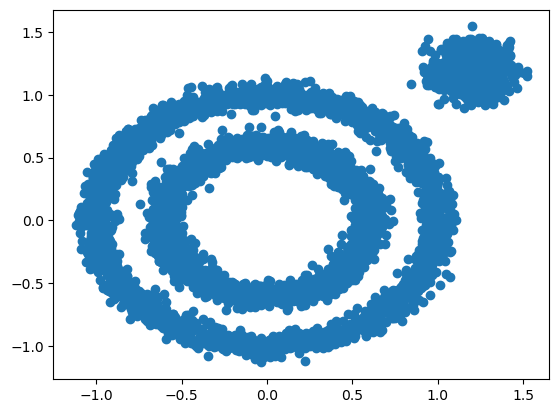

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples=5000, factor=.6, noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2, 1.2]],cluster_std=[[.1]],random_state=9)
X=np.concatenate((X1,X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')


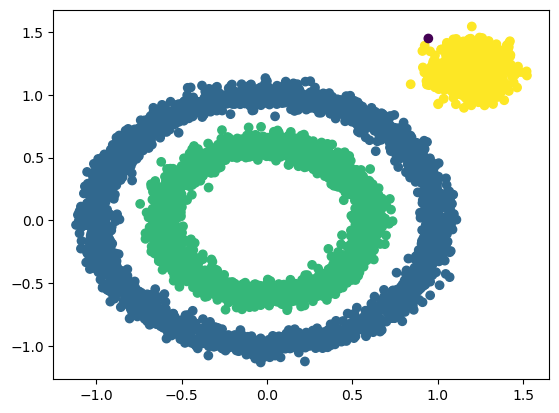

In [3]:
from sklearn.cluster import DBSCAN
y_pred=DBSCAN(eps=0.1,min_samples=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],c=y_pred)
plt.show()

In [1]:
# 1. 寻找核心点形成临时聚类簇。
# 扫描全部样本点，如果某个样本点R半径范围内点数目>=MinPoints，则将其纳入核心点列表，并将其密度直达的点形成对应的临时聚类簇。
# 2，合并临时聚类簇得到聚类簇。
# 对于每一个临时聚类簇，检查其中的点是否为核心点，如果是，将该点对应的临时聚类簇和当前临时聚类簇合并，得到新的临时聚类簇。
# 重复此操作，直到当前临时聚类簇中的每一个点要么不在核心点列表，要么其密度直达的点都已经在该临时聚类簇，该临时聚类簇升级成为聚类簇。
# 继续对剩余的临时聚类簇进行相同的合并操作，直到全部临时聚类簇被处理。
class DBscan:
    def __init__(self,eps,MinPts):
        self.eps = eps
        self.MinPts = MinPts
    
    # 返回样本点eps半径范围内的索引
    def regionQuery(self,i,x):
        # 计算当前点与其他所有点的距离
        diff = i - x
        distances = np.sqrt(np.square(diff).sum(axis=1))
        #返回满足邻域点的索引
        return list(np.where(distances <= self.eps)[0])
    
    def fit(self,x):

        #初始标签为-1
        label = -1
        m =len(x)
        #初始化所有样本点所属的类别，定为-1
        cluster = [-1 for i in range(m)]
        #已访问样本点
        visited = []   

        for p in range(m):   # 遍历每个点
            if p not in visited:  # 如果没有访问过则执行

                NeighborPts = self.regionQuery(x[p],x)  # NeighborPts是p的领域点

                '''1. 寻找核心点形成临时聚类簇。'''
                if len(NeighborPts) < self.MinPts: # 半径范围内点数目 < MinPoints，跳过
                    #默认标记为-1，后面可能会被加入到其他的邻域内，成为一个密度可达点
                    continue

                else:    # 半径范围内点数目>=MinPoints，即当前点为核心点
                    label += 1
                    cluster[p] = label

                    '''2，合并临时聚类簇得到聚类簇。'''
                    #列表NeighborPts是动态变化的，添加没有访问过的全部密度可达点，划分到一个簇
                    for p_1 in NeighborPts: # 对核心点的领域点（即临时聚类簇）操作
                        if p_1 not in visited:

                            visited.append(p_1)  # 标记访问
                            Ner_NeighborPts = self.regionQuery(x[p_1],x) # 返回每个领域点半径范围内的点

                            if len(Ner_NeighborPts) >= self.MinPts:  # 检查每个领域点半径范围内的点是否满足数量要求
                                for a in Ner_NeighborPts:            # 满足则将这些领域范围内的点加入NeighborPts
                                    if a not in NeighborPts:
                                        NeighborPts.append(a)   #使得NeighborPts一直更新，下次检查领域范围内的点的领域点是否满足要求，一直扩张，直到无法扩张
                                        
                            #同时把p_1的类别改为label
                            cluster[p_1] = label
        return cluster

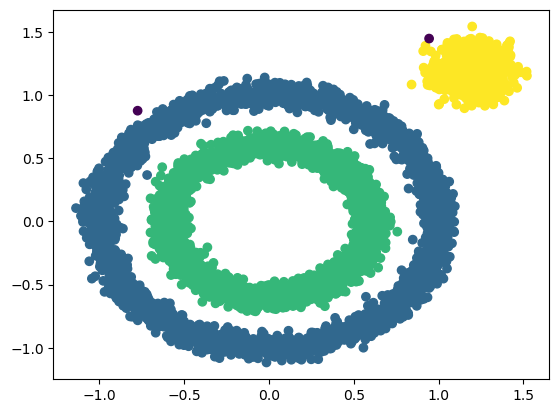

In [3]:
x1,y1 = make_circles(n_samples=5000,factor=0.6,noise=0.05,random_state=2020)
x2,y2 = make_blobs(n_samples=1000,n_features=2,centers=[[1.2,1.2]],cluster_std=0.1,random_state=9)
x1 = np.concatenate((x1,x2))
 
Dbscan =DBscan(eps=0.1,MinPts=10)
y_pred = Dbscan.fit(x1)
plt.scatter(x1[:,0],x1[:,1],c=y_pred,marker='o')
plt.show()

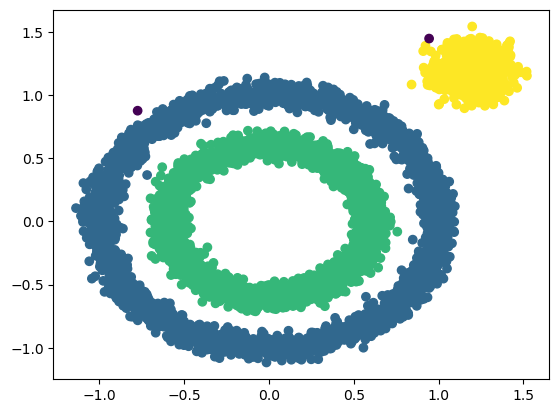

In [4]:
model = DBSCAN(eps=0.1,min_samples=10)
y_preds = model.fit_predict(x1)
plt.scatter(x1[:,0],x1[:,1],c=y_preds,marker='o')
plt.show()